<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#あらまし" data-toc-modified-id="あらまし-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>あらまし</a></span></li><li><span><a href="#導入" data-toc-modified-id="導入-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>導入</a></span><ul class="toc-item"><li><span><a href="#時系列データの構成" data-toc-modified-id="時系列データの構成-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>時系列データの構成</a></span></li></ul></li><li><span><a href="#問題の定義" data-toc-modified-id="問題の定義-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>問題の定義</a></span></li><li><span><a href="#データの理解" data-toc-modified-id="データの理解-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>データの理解</a></span><ul class="toc-item"><li><span><a href="#仮説の設定" data-toc-modified-id="仮説の設定-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>仮説の設定</a></span></li><li><span><a href="#import-&amp;-データ読み込み" data-toc-modified-id="import-&amp;-データ読み込み-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>import &amp; データ読み込み</a></span></li><li><span><a href="#データ構造と内容の確認" data-toc-modified-id="データ構造と内容の確認-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>データ構造と内容の確認</a></span></li><li><span><a href="#特徴量の作成" data-toc-modified-id="特徴量の作成-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>特徴量の作成</a></span></li><li><span><a href="#データ探索" data-toc-modified-id="データ探索-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>データ探索</a></span></li></ul></li><li><span><a href="#様々な技術を用いたモデリング" data-toc-modified-id="様々な技術を用いたモデリング-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>様々な技術を用いたモデリング</a></span><ul class="toc-item"><li><span><a href="#テストデータ作成" data-toc-modified-id="テストデータ作成-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>テストデータ作成</a></span></li><li><span><a href="#モデリング技術" data-toc-modified-id="モデリング技術-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>モデリング技術</a></span></li><li><span><a href="#ホルツ線形トレンドモデル" data-toc-modified-id="ホルツ線形トレンドモデル-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>ホルツ線形トレンドモデル</a></span></li><li><span><a href="#ARIMAモデル" data-toc-modified-id="ARIMAモデル-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>ARIMAモデル</a></span></li><li><span><a href="#SARIMAXモデル" data-toc-modified-id="SARIMAXモデル-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>SARIMAXモデル</a></span></li></ul></li><li><span><a href="#playground" data-toc-modified-id="playground-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>playground</a></span></li></ul></div>

In [3]:
import pandas as pd
import numpy as np
import japanize_matplotlib
import matplotlib.pyplot as plt
from PIL import Image


# あらまし
- この教材について
    - 時系列データ予測は、来客数、株価やウェブサイトのアクセス数の簡単な予測をする際に非常に便利です。
    - 時系列データ予測は、全てのデータサイエンティストにとって必須のスキルです。
    - この教材では、予測に対する実用的なアプリ―チを紹介します。
- 予備知識・技術
    - Pythonの基本構文が理解できる
- 教材の目的
    - 時系列データ予測に必要な知識や技術を修得すること
- 教材のねらい
    - 時系列データへの理解
    - データ分析・理解
    - 様々な時系列データ予測の解放

# 導入

突然ですが、以下のどちらが時系列データだと思いますか？

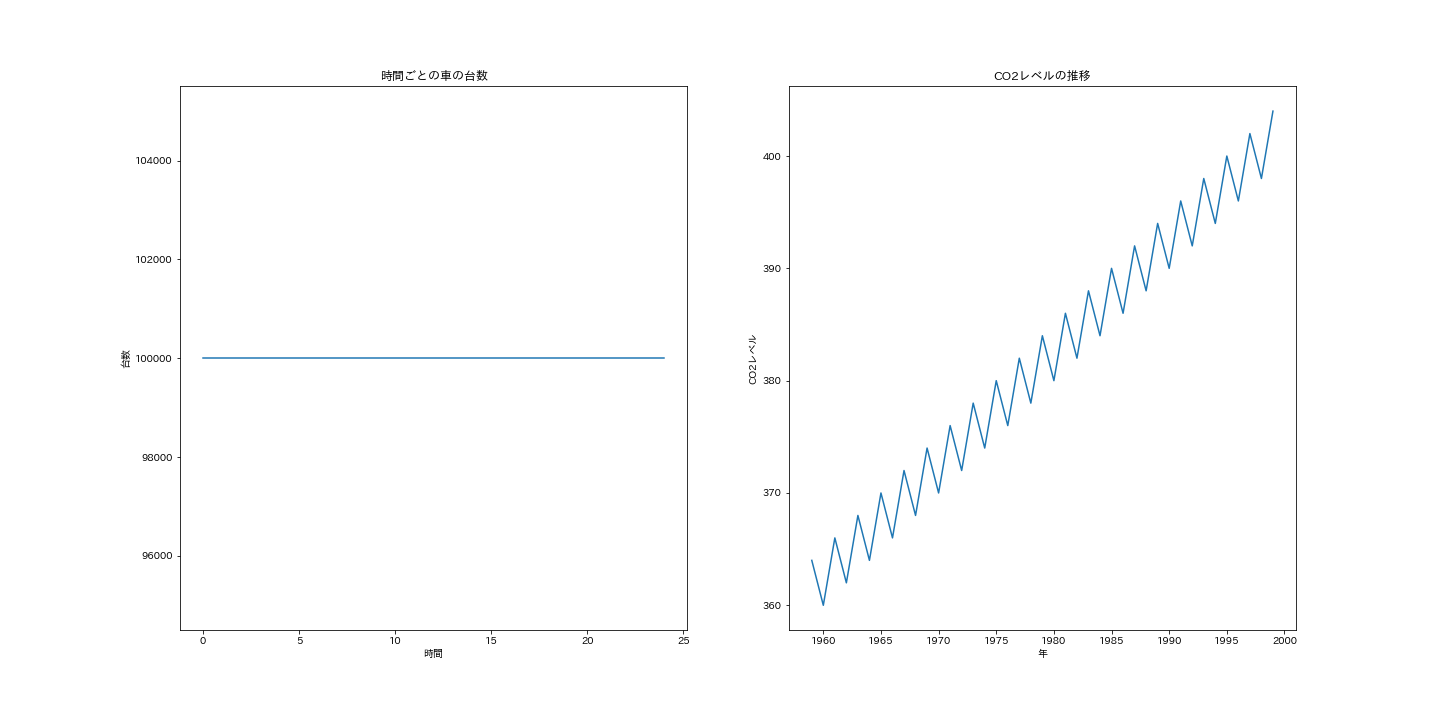

In [4]:
display(Image.open("../reports/figures/compare.png"))

- 左図の車の台数は時間とは関係のないデータ（時間の推移に関して値が変動しない）であることが分かることから、  
**時系列データではない**ことが分かります。
- 一方、CO2レベルの方は、年を追うごとに値が大きくなっていることが分かることから、  
**時系列データである**ことがわかります。  

この様に、時間に沿って取得できて、  
なおかつ時間と相関がある（1時間前と2時間前の値に相関がある）ようなデータのことを時系列データと呼びます。

その他の時系列データの例を以下に列挙しておきます。
- 株価
- 飛行機の搭乗者数
- 海水面の水位
  
この様に、身近なデータには時系列データが多く存在しています。

## 時系列データの構成

　上では、時系列データと非時系列データの違いを確認しました。ここでは時系列データの構成要素を確認していきましょう。
 

- **トレンド:**  
　トレンドは値の発展や変化の大まかな方向のことです。以下の時系列データでは、時間を追うごとに上昇しているトレンドを確認できます。赤いラインがそのトレンド自体を示していると思ってください。

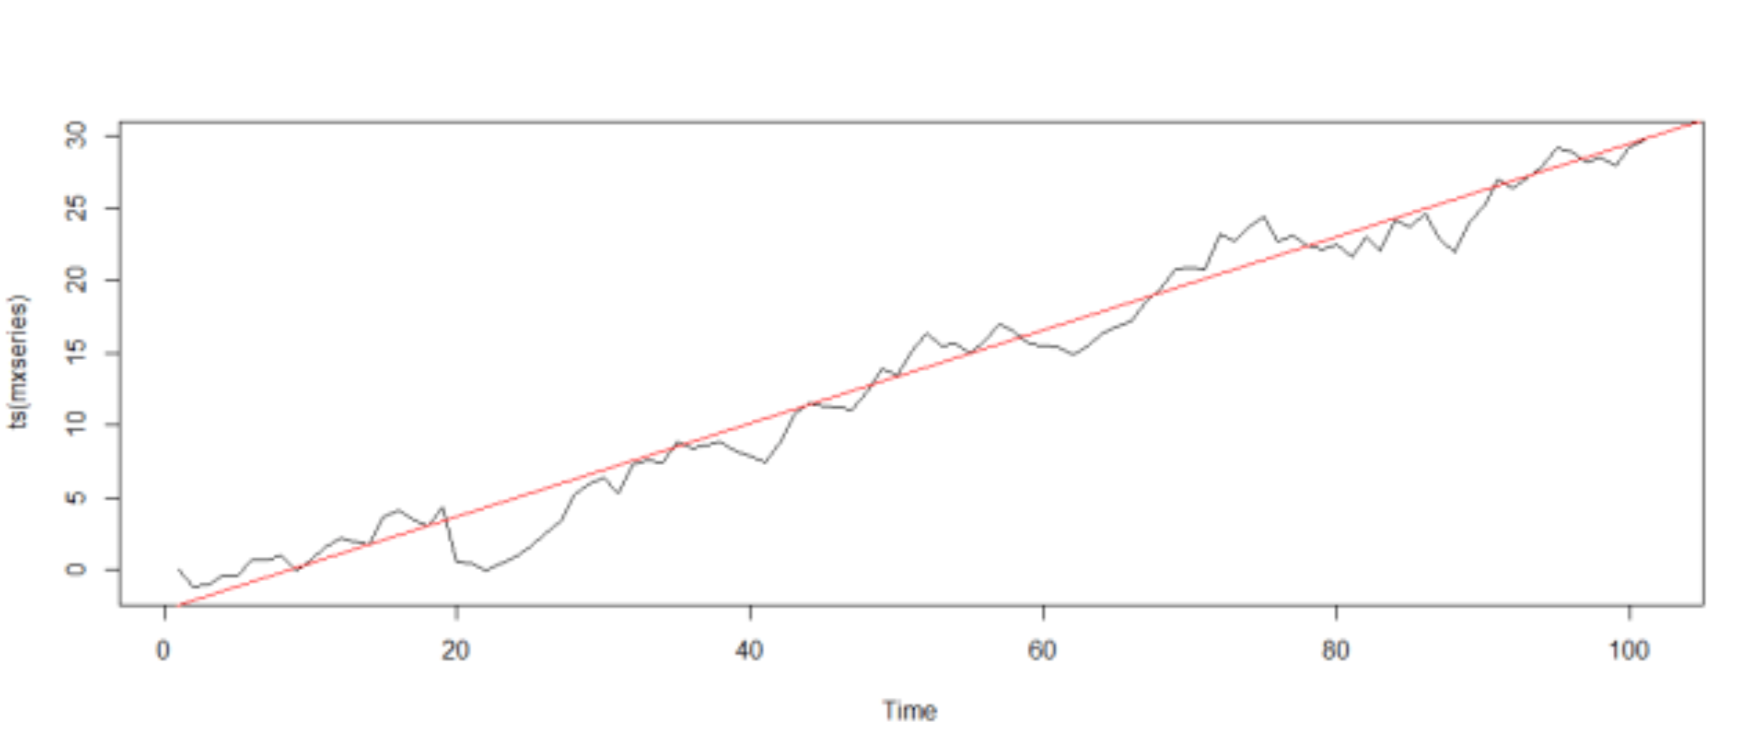

In [5]:
display(Image.open("../reports/figures/trend.png"))

- **季節性:**  
　上の時系列データは明らかにトレンド以外のパターンが存在しています。分かり易い例を挙げると以下のグラフをご覧ください。この一定周期ごとの規則的な値の上下動を季節性と呼びます。以下のグラフでは、１年周期で値が上下動することが分かります。

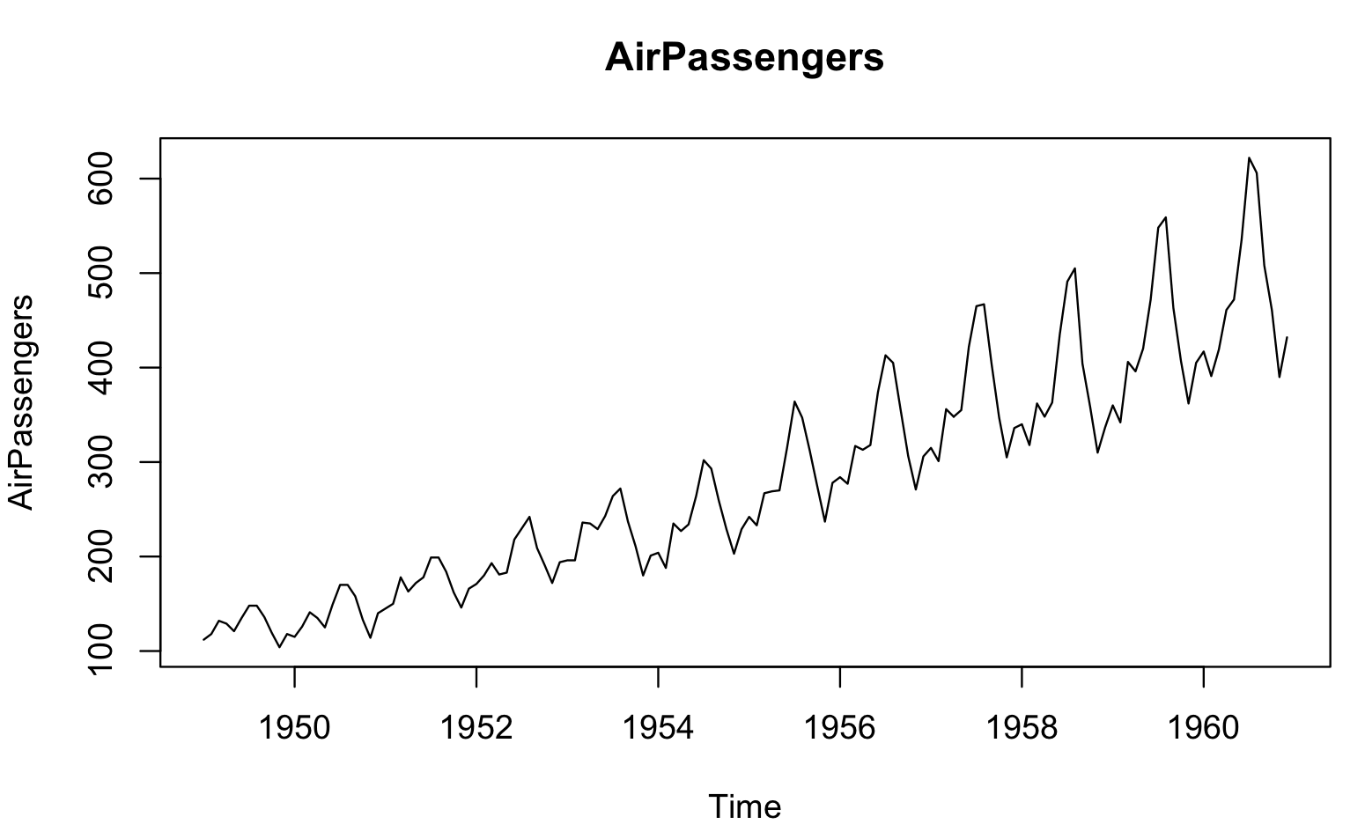

In [6]:
display(Image.open("../reports/figures/seasonality.png"))

**※時系列問題と回帰問題の違いはなんなのか？**  
　時系列データは大抵、連続値を予想するので回帰問題として解くこともできそうです。  
しかし、時系列問題は以下2点の手法で普通の回帰問題と違います。  
- 主な違いは、時系列問題は時間に依存することです。裏を返せば、時間に依存しない連続値の目的変数を予測する問題が普通の回帰問題だということです。  
- 時系列データはトレンドに加えて、基本的には季節性が存在します。  

よって、時系列問題を普通の回帰問題として解くのは少々危険です。  


# 問題の定義

　上では、時系列に関する概要を学びました。早速、このコースで解く時系列問題の定義を確認していきましょう。  
  
**問題定義**  
　あなたは仮想通貨：シェアードコイン（架空の通貨）の自動取引プログラムを作ろうとしています。これまでの人間が考えたルールベースではなかなか利益があがらないこということに課題を感じており、機械学習で精緻な価格予測をした上で取引をすることで、利益率を高めようと考えています。具体的には、実際の価格と予測の**RMSEが1程度**になれば目標とする利益がだせそうです。
 
**使用データ**
- 学習データ: ../data/raw/train.csv


# データの理解

　それでは最初のステップ――仮説の設定から始めましょう。仮説の設定フェーズは非常に重要で、ここでは予測したいことに影響する現象をすべて列挙しておく必要があります。  
 
 - **仮説１：仮想通貨は長期的にみて価格上昇の傾向にあるのではないか？**
     - 法定通貨に比べて、決済の便利さやスマートコントラクトなどの付随する機能があることを踏まえると  
     本質的には価値の高いものであり、その価値観が徐々に浸透していくだろうから。  


 - **仮説２：シェアードコインは5～10月に価格が上昇する**
     - シェアードコインは毎年5月にバージョンアップをして機能追加をしているため、  
     その話題性から、期待を寄せているひとや噂を聞きつけたひとに買われているだろうから。  


 - **仮説３：平日の取引量は、休日や祝日に比べて小さい**
     - 本職のある個人投資家は、平日の取引できる時間が限られているため
     
 - **仮説４：通勤ラッシュ時の取引量は高くなる**
     - 通勤時にスマホで取引する人が多い  
  
仮説が列挙できたところで、仮説が本当に楽しいのかを確認していきましょう。

## 仮説の設定

In [16]:
import pandas as pd              # データ操作のためのライブラリ
import numpy as np               # 数学的な計算ライブラリ
import matplotlib.pyplot as plt  # グラフ出力ライブラリ
from datetime import datetime    # 日付や時間などの時系列計算のためのライブラリ
%matplotlib inline


In [15]:
train = pd.read_csv("../data/raw/Train.csv")
train_org = train.copy()

## import & データ読み込み

## データ構造と内容の確認

## 特徴量の作成

## データ探索

# 様々な技術を用いたモデリング

## テストデータ作成

## モデリング技術

## ホルツ線形トレンドモデル

## ARIMAモデル

## SARIMAXモデル

# playground

In [1]:
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *

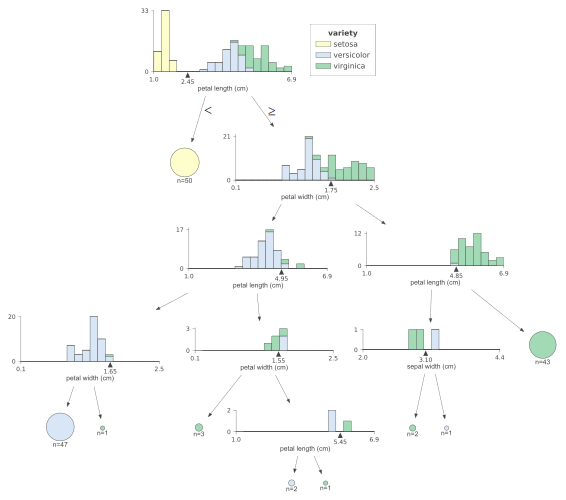

In [2]:
classifier = tree.DecisionTreeClassifier(min_samples_split=3)  # limit depth of tree
iris = load_iris()
classifier.fit(iris.data, iris.target)

viz = dtreeviz(classifier, 
               iris.data, 
               iris.target,
               target_name='variety',
              feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"]  # need class_names for classifier
              )  
              
viz
